<a href="https://colab.research.google.com/github/uuuuju/California-Housing-Price-Prediction/blob/main/California_Housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [4]:
data_frame = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

In [5]:
data_frame["median_house_value"] /= 1000.0

In [6]:
data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [7]:
data_frame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [29]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model        

In [30]:
def train_model(model, df, feature, label, epochs, batch_size):
   history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)
   trained_weight = model.get_weights()[0]
   trained_bias = model.get_weights()[1]
   epochs = history.epoch
   hist = pd.DataFrame(history.history)
   rmse = hist["root_mean_squared_error"]

   return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [31]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel(feature)
  plt.ylabel(label)
  random_examples = data_frame.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()

In [32]:
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [33]:
learning_rate = 0.01
epochs = 30
batch_size = 30

using total rooms as the only feature to train the model

In [34]:
my_feature = "total_rooms"
my_label="median_house_value" 

In [35]:
my_model = None
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data_frame, 
                                         my_feature, my_label,
                                         epochs, batch_size)

Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 3946703.5000 - root_mean_squared_error: 1986.6312
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 27673.8809 - root_mean_squared_error: 166.3547
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 27104.7422 - root_mean_squared_error: 164.6352
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26104.9785 - root_mean_squared_error: 161.5704
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25663.4316 - root_mean_squared_error: 160.1981
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 25073.1016 - root_mean_squared_error: 158.3449
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24123.7637 - root_mean_squared_error: 155.3183
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23757.5449 - root_mean_squared_error: 154.1348
Epoch 9/30
567/567 [=========


The learned weight for your model is 0.0332
The learned bias for your model is 132.3363



/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


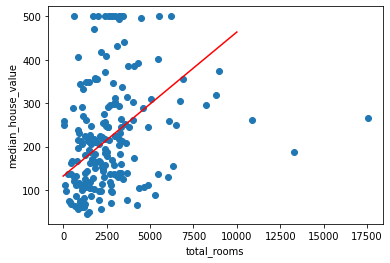

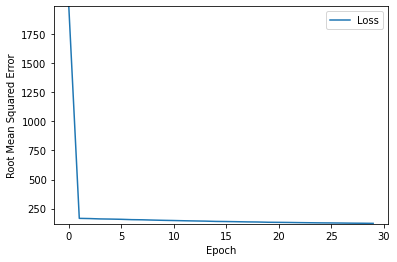

In [36]:
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [37]:
def predict_house_values(n, feature, label):
  batch = data_frame[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)
  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (data_frame[feature][10000 + i],
                                   data_frame[label][10000 + i],
                                   predicted_values[i][0] ))  

In [38]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             197
 3400     92             245
 3677     69             254
 2202     62             205
 2403     80             212
 5652    295             320
 3318    500             242
 2552    342             217
 1364    118             178
 3468    128             247


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 197916.7500 - root_mean_squared_error: 444.8784
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 27621.5156 - root_mean_squared_error: 166.1972
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 27231.4766 - root_mean_squared_error: 165.0196
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26132.7695 - root_mean_squared_error: 161.6563
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25758.6914 - root_mean_squared_error: 160.4951
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 24824.8555 - root_mean_squared_error: 157.5591
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24069.7656 - root_mean_squared_error: 155.1443
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23697.4414 - root_mean_squared_error: 153.9397
Epoch 9/30
567/567 [===========

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


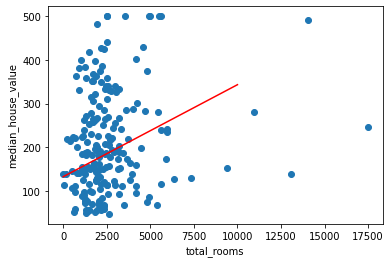

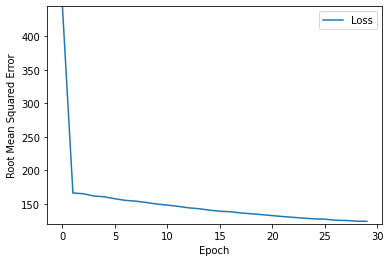

In [39]:
learning_rate = 0.01
epochs = 30
batch_size = 30

my_feature = "total_rooms"
my_label="median_house_value"

my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data_frame, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Using population as the feature to train the model

Epoch 1/3
142/142 [==============================] - 1s 1ms/step - loss: 3364297.0000 - root_mean_squared_error: 1834.2020
Epoch 2/3
142/142 [==============================] - 0s 1ms/step - loss: 3303284.5000 - root_mean_squared_error: 1817.4940
Epoch 3/3
142/142 [==============================] - 0s 1ms/step - loss: 3062484.2500 - root_mean_squared_error: 1749.9955


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


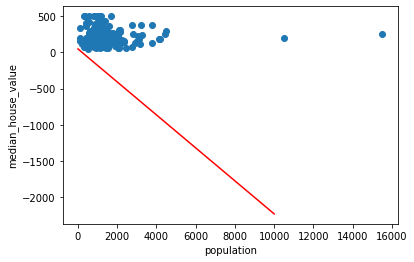

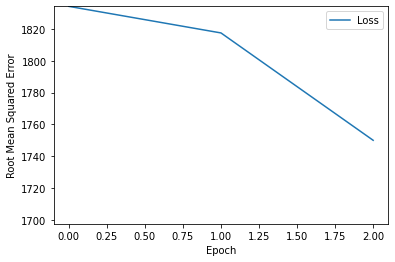

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53            -245
 1867     92            -378
 2191     69            -452
 1052     62            -192
 1647     80            -328
 2312    295            -479
 1604    500            -318
 1066    342            -195
  338    118             -29
 1604    128            -318
 1200    187            -226
  292     80             -19
 2014    112            -411
 1817     95            -367
 1328     69            -255


In [40]:
my_feature = "population"  

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data_frame, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Tuning the hyperparameters

Epoch 1/18
5667/5667 [==============================] - 8s 1ms/step - loss: 28444.0039 - root_mean_squared_error: 168.6535
Epoch 2/18
5667/5667 [==============================] - 7s 1ms/step - loss: 19178.0918 - root_mean_squared_error: 138.4850
Epoch 3/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17972.0039 - root_mean_squared_error: 134.0597
Epoch 4/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17404.8457 - root_mean_squared_error: 131.9274
Epoch 5/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17395.4258 - root_mean_squared_error: 131.8917
Epoch 6/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17269.7734 - root_mean_squared_error: 131.4145
Epoch 7/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17648.4648 - root_mean_squared_error: 132.8475
Epoch 8/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17491.1250 - root_mean_squared_error: 132.2540
Epoch 9/18
5667/

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


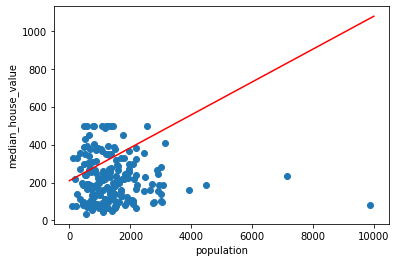

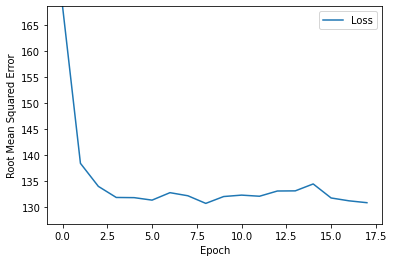

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             321
 1867     92             372
 2191     69             400
 1052     62             301
 1647     80             353
 2312    295             410
 1604    500             349
 1066    342             302
  338    118             239
 1604    128             349


In [41]:
my_feature = "population"

learning_rate = 0.045
epochs = 18
batch_size = 3

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data_frame, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Defining a synthetic feature, the ratio of number of rooms to the population

Epoch 1/24
567/567 [==============================] - 1s 1ms/step - loss: 37598.4492 - root_mean_squared_error: 193.9032
Epoch 2/24
567/567 [==============================] - 1s 1ms/step - loss: 18927.4902 - root_mean_squared_error: 137.5772
Epoch 3/24
567/567 [==============================] - 1s 1ms/step - loss: 15078.7119 - root_mean_squared_error: 122.7954
Epoch 4/24
567/567 [==============================] - 1s 1ms/step - loss: 14839.7676 - root_mean_squared_error: 121.8186
Epoch 5/24
567/567 [==============================] - 1s 1ms/step - loss: 14663.3340 - root_mean_squared_error: 121.0923
Epoch 6/24
567/567 [==============================] - 1s 1ms/step - loss: 14498.4199 - root_mean_squared_error: 120.4094
Epoch 7/24
567/567 [==============================] - 1s 1ms/step - loss: 14358.4707 - root_mean_squared_error: 119.8268
Epoch 8/24
567/567 [==============================] - 1s 1ms/step - loss: 14231.1484 - root_mean_squared_error: 119.2944
Epoch 9/24
567/567 [============

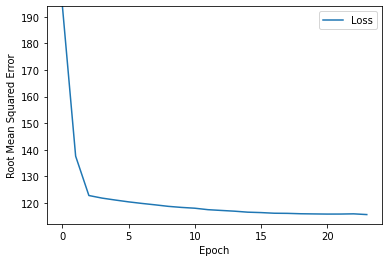

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             202
    2     69             196
    2     62             213
    1     80             188
    2    295             227
    2    500             212
    2    342             225
    4    118             292
    2    128             216
    2    187             226
    3     80             237
    2    112             227
    2     95             221
    2     69             212


In [42]:
data_frame["rooms_per_person"] = data_frame["total_rooms"] / data_frame["population"]
my_feature = "rooms_per_person"   

learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, data_frame,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


In [20]:
data_frame.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0
